(32561, 124) (32561,)
(16281, 124) (16281,)
SGD_loss = 0.693147
SGD_loss = 0.636796
SGD_loss = 0.602863
SGD_loss = 0.588134
SGD_loss = 0.577103
SGD_loss = 0.552865
SGD_loss = 0.544470
SGD_loss = 0.538875
SGD_loss = 0.529800
SGD_loss = 0.525820
SGD_loss = 0.519108
SGD_loss = 0.512128
SGD_loss = 0.508659
SGD_loss = 0.506564
SGD_loss = 0.503588
SGD_loss = 0.499343
SGD_loss = 0.496166
SGD_loss = 0.491995
SGD_loss = 0.492127
SGD_loss = 0.489502
SGD_loss = 0.491466
SGD_loss = 0.485470
SGD_loss = 0.483082
SGD_loss = 0.477605
SGD_loss = 0.474523
SGD_loss = 0.474238
SGD_loss = 0.475328
SGD_loss = 0.471541
SGD_loss = 0.472884
SGD_loss = 0.467416
SGD_loss = 0.464165
SGD_loss = 0.463985
SGD_loss = 0.460130
SGD_loss = 0.453973
SGD_loss = 0.452437
SGD_loss = 0.450993
SGD_loss = 0.449968
SGD_loss = 0.447837
SGD_loss = 0.444933
SGD_loss = 0.443455
SGD_loss = 0.442227
SGD_loss = 0.441716
SGD_loss = 0.440624
SGD_loss = 0.441741
SGD_loss = 0.440031
SGD_loss = 0.438227
SGD_loss = 0.436006
SGD_loss = 0.434

RMSProp_loss = 0.501597
RMSProp_loss = 0.494568
RMSProp_loss = 0.489845
RMSProp_loss = 0.476698
RMSProp_loss = 0.474208
RMSProp_loss = 0.469822
RMSProp_loss = 0.465016
RMSProp_loss = 0.460045
RMSProp_loss = 0.461835
RMSProp_loss = 0.457100
RMSProp_loss = 0.448575
RMSProp_loss = 0.444794
RMSProp_loss = 0.445088
RMSProp_loss = 0.446289
RMSProp_loss = 0.441748
RMSProp_loss = 0.436781
RMSProp_loss = 0.432402
RMSProp_loss = 0.430137
RMSProp_loss = 0.426870
RMSProp_loss = 0.424401
RMSProp_loss = 0.421989
RMSProp_loss = 0.420082
RMSProp_loss = 0.415703
RMSProp_loss = 0.422196
RMSProp_loss = 0.415549
RMSProp_loss = 0.411699
RMSProp_loss = 0.409003
RMSProp_loss = 0.409125
RMSProp_loss = 0.410239
RMSProp_loss = 0.408548
RMSProp_loss = 0.408787
RMSProp_loss = 0.413731
RMSProp_loss = 0.406805
RMSProp_loss = 0.396845
RMSProp_loss = 0.402499
RMSProp_loss = 0.396885
RMSProp_loss = 0.393605
RMSProp_loss = 0.393094
RMSProp_loss = 0.388270
RMSProp_loss = 0.386240
RMSProp_loss = 0.384509
RMSProp_loss = 0

AdaDelta_loss = 0.346494
AdaDelta_loss = 0.347723
AdaDelta_loss = 0.349310
AdaDelta_loss = 0.349293
AdaDelta_loss = 0.349434
AdaDelta_loss = 0.347075
AdaDelta_loss = 0.346229
AdaDelta_loss = 0.348154
AdaDelta_loss = 0.349636
AdaDelta_loss = 0.351104
AdaDelta_loss = 0.347089
AdaDelta_loss = 0.345272
AdaDelta_loss = 0.344067
AdaDelta_loss = 0.344113
AdaDelta_loss = 0.344304
AdaDelta_loss = 0.343724
AdaDelta_loss = 0.343124
AdaDelta_loss = 0.343856
AdaDelta_loss = 0.344229
AdaDelta_loss = 0.342863
AdaDelta_loss = 0.344036
AdaDelta_loss = 0.342507
AdaDelta_loss = 0.343193
AdaDelta_loss = 0.341725
AdaDelta_loss = 0.341468
AdaDelta_loss = 0.341711
AdaDelta_loss = 0.341626
AdaDelta_loss = 0.342272
AdaDelta_loss = 0.345203
AdaDelta_loss = 0.341399
AdaDelta_loss = 0.340545
AdaDelta_loss = 0.340307
AdaDelta_loss = 0.341272
AdaDelta_loss = 0.341903
AdaDelta_loss = 0.342139
AdaDelta_loss = 0.342145
AdaDelta_loss = 0.342411
AdaDelta_loss = 0.341509
AdaDelta_loss = 0.339977
AdaDelta_loss = 0.341183


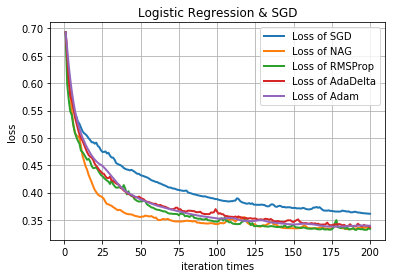

In [4]:
import numpy as np
import math
from matplotlib import pyplot as plt
from sklearn.datasets import load_svmlight_file


def loadDataSet():
    # 读取数据
    X_train,y_train=load_svmlight_file("D:\machine learning\experiment\lab_2\\a9a.txt")
    X_validation, y_validation = load_svmlight_file("D:\machine learning\experiment\lab_2\\a9a(testing).txt")
    #将稀疏矩阵转化为完整特征矩阵
    X_train = X_train.todense()
    X_validation = X_validation.todense()
    #对X增加一列全为1,验证集需要先补0
    X_train = np.column_stack((X_train, np.ones(y_train.shape[0])))
    X_validation = np.column_stack((X_validation, np.zeros(y_validation.shape[0])))
    X_validation = np.column_stack((X_validation, np.ones(y_validation.shape[0])))
    #对y所有的-1用0代替
    y_train = np.array(list(map((lambda x: 0 if x <= 0 else 1), y_train)))
    y_validation = np.array(list(map((lambda x: 0 if x <= 0 else 1), y_validation)))
    print(X_train.shape,y_train.shape)
    print(X_validation.shape,y_validation.shape)
    return X_train, X_validation, y_train, y_validation

def sigmoid(inX):
    return 1.0/(1+math.exp(-inX))

def loss_function(X_data,y_data,w):
    loss = 0.0
    num = y_data.shape[0]
    for i in range(num):
        y = sigmoid(np.dot(X_data[i][0].getA()[0], w))
        loss += - (y_data[i] * math.log(y) + (1 - y_data[i]) * math.log(1 - y)) / num
    return loss

def stocGradDescent(epoch,X_train,X_validation,y_train,y_validation,opt):
    num = y_train.shape[0]    #样本数量
    batch = int(5000/epoch)
    # 线性模型参数全零初始化
    w = np.zeros(X_train.shape[1])
    v = np.zeros(X_train.shape[1],dtype=np.float)
    G = np.zeros(X_train.shape[1], dtype=np.float)
    dx = np.zeros(X_train.shape[1], dtype=np.float)
    m = np.zeros(X_train.shape[1],dtype=np.float)
    t = 0
    losss = []

    # 迭代次maxCycles次
    for n in range(epoch):
        grad_w = np.zeros(X_train.shape[1])
        loss = loss_function(X_validation, y_validation, w)
        for i in range(batch):
            index = np.random.randint(0,num-1)
            y = sigmoid(np.dot( X_train[index][0].getA()[0], w))
            grad_w += ( y - y_train[index] ) * X_train[index][0].getA()[0] / batch

        #更新模型参数
        if ( opt == 'SGD'):
            updates = SGD(w, grad_w)
        elif ( opt == 'NAG'):
            updates, v = NAG(w, grad_w, v)
        elif ( opt == 'RMSProp'):
            updates, G = RMSProp(w, grad_w, G)
        elif ( opt == 'AdaDelta'):
            updates, G, dx= AdaDelta(w, grad_w, G, dx)
        elif ( opt == 'Adam'):
            updates, G, m, t = Adam(w, grad_w, G, m, t)

        for i in range(len(w)):
            w[i] = updates[i][1]
        losss.append(loss)
        print("%s_loss = %f" % (opt, loss))
    return losss

def SGD(parameters, gradients, eta=0.1):
    updates = [(parameters[i], parameters[i] - eta * gradients[i])
               for i in range(len(parameters))]
    return updates

def NAG(parameters, gradients, v, eta=0.05, gamma=.9):
    para_num = len(parameters)
    v_prev = v
    v = np.array([gamma * v[i] + eta * gradients[i] for i in range(para_num)])
    updates = [(parameters[i], parameters[i] - ( - gamma * v_prev[i] + ( 1 + gamma ) * v[i]))
                    for i in range(para_num)]

    return updates, v

def RMSProp(parameters, gradients, G, eta=.01, gamma=0.9, epsilon=1e-8):
    para_num = len(parameters)
    G = np.array([gamma * G[i] + (1 - gamma) * (gradients[i])**2 for i in range(para_num)])
    updates = [(parameters[i], parameters[i] - eta * gradients[i] / math.sqrt(G[i] + epsilon))
                for i in range(para_num)]
    return updates, G

def AdaDelta(parameters, gradients, G, dx, gamma=0.95, epsilon=1e-5):
    para_num = len(parameters)
    G = np.array([gamma * G[i] + (1 - gamma) * (gradients[i]**2) for i in range(para_num)])
    dw = [math.sqrt(dx[i] + epsilon) / math.sqrt(G[i] + epsilon) * gradients[i] for i in range(para_num)]
    updates = [(parameters[i], parameters[i] - dw[i])
               for i in range(para_num)]
    dx = np.array([gamma * dx[i] + (1 - gamma) * (dw[i]**2) for i in range(para_num)])
    return updates, G, dx

def Adam(parameters, gradients, G, m, t, eta=0.01, gamma=0.999, beta=0.9, epsilon=1e-8):
    t += 1
    para_num = len(parameters)
    m = np.array([beta * m[i] + (1 - beta) * gradients[i] for i in range(para_num)])
    G = np.array([gamma * G[i] + (1 - gamma) * (gradients[i]**2) for i in range(para_num)])
    updates = [(parameters[i], parameters[i] - eta * math.sqrt(1 - gamma**t) / (1 - beta**t) * m[i] / math.sqrt(G[i] + epsilon))
                for i in range(para_num)]
    return updates, G, m, t

def plotLossPerTime(epoch, sgd_losss, nag_losss, rms_losss, adad_losss, adam_losss):
    plt.xlabel('iteration times')
    plt.ylabel('loss')
    plt.title('Logistic Regression & SGD')
    n_cycles = range(1,epoch+1)
    plt.plot(n_cycles, sgd_losss, label = "Loss of SGD", linewidth=2)
    plt.plot(n_cycles, nag_losss, label="Loss of NAG", linewidth=2)
    plt.plot(n_cycles, rms_losss, label="Loss of RMSProp", linewidth=2)
    plt.plot(n_cycles, adad_losss, label="Loss of AdaDelta", linewidth=2)
    plt.plot(n_cycles, adam_losss, label="Loss of Adam", linewidth=2)
    plt.legend(loc=0)
    plt.grid()
    plt.show()

# main
X_train, X_validation, y_train, y_validation = loadDataSet()
epoch = 200
sgd_losss = stocGradDescent(epoch, X_train, X_validation, y_train, y_validation, 'SGD')
nag_losss = stocGradDescent(epoch, X_train, X_validation, y_train, y_validation, 'NAG')
rms_losss = stocGradDescent(epoch, X_train, X_validation, y_train, y_validation, 'RMSProp')
adad_losss = stocGradDescent(epoch, X_train, X_validation, y_train, y_validation, 'AdaDelta')
adam_losss = stocGradDescent(epoch, X_train, X_validation, y_train, y_validation, 'Adam')
plotLossPerTime(epoch, sgd_losss, nag_losss, rms_losss, adad_losss, adam_losss)